In [1]:
import networkx as nx
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]
import collections
import numpy as np
import operator
import powerlaw

# Introduction to NetworkX 

## Undirected 

In [2]:
G = nx.Graph()

In [3]:
G.add_node(1)

In [4]:
G.add_nodes_from([2,3])

In [5]:
G.add_edge(1,2)

In [6]:
G.add_edges_from([(1,3),(2,3)])

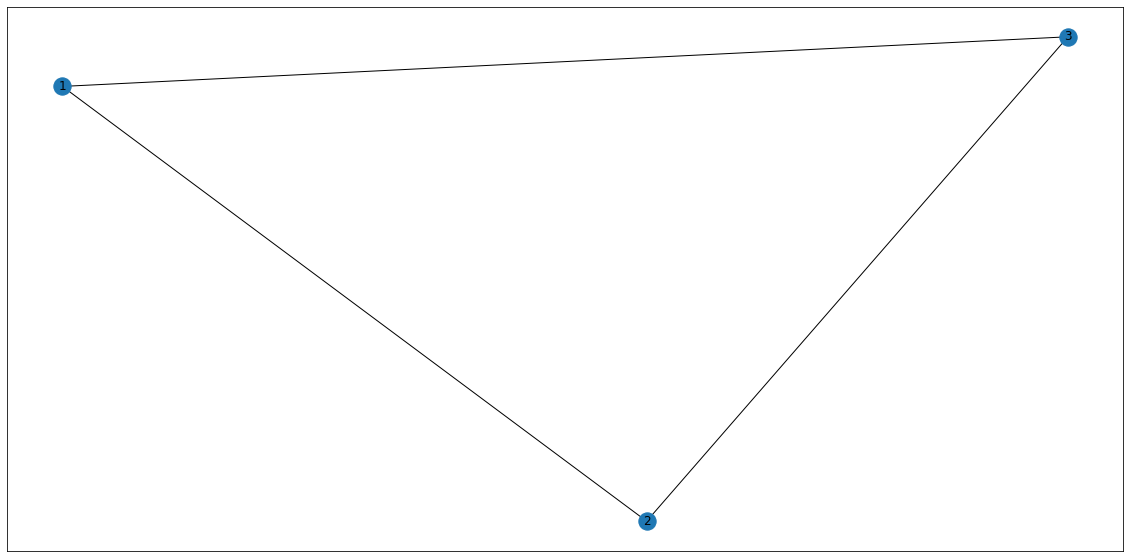

In [7]:
nx.draw_networkx(G)

## Directed

In [8]:
G = nx.DiGraph()

In [9]:
G.add_nodes_from([1,2,3])

In [10]:
G.add_edges_from([(1,2),(1,3),(2,3),(1,2)])

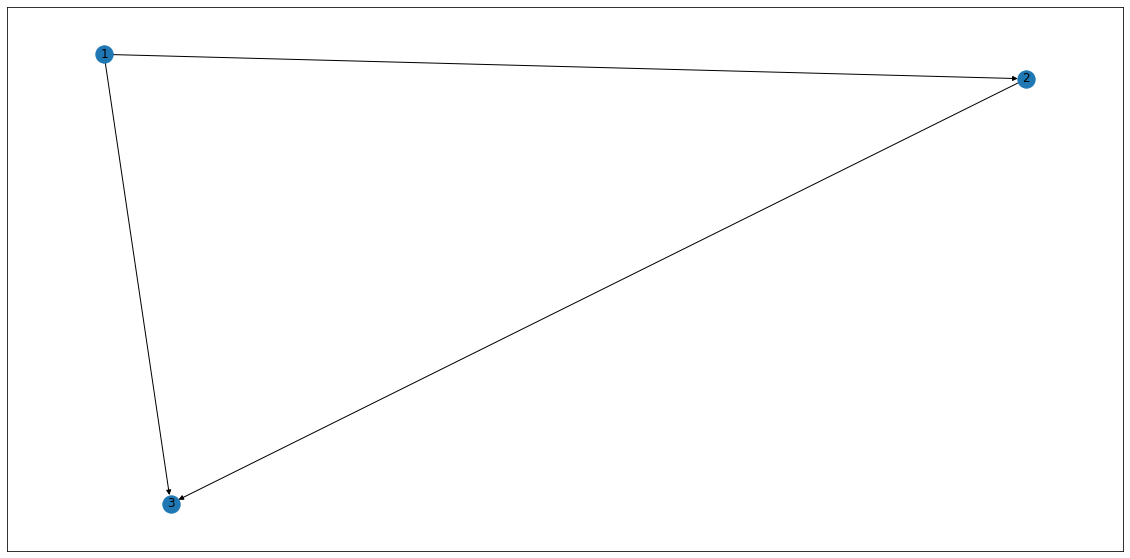

In [11]:
nx.draw_networkx(G)

## Multi Graph

In [12]:
G = nx.MultiDiGraph()

In [13]:
G.add_nodes_from([1,2,3])

In [14]:
G.add_edges_from([(1,2),(1,3),(2,3),(1,2)])

[0, 0, 0, 1]

In [15]:
G.add_edges_from([(1,2)]*10)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

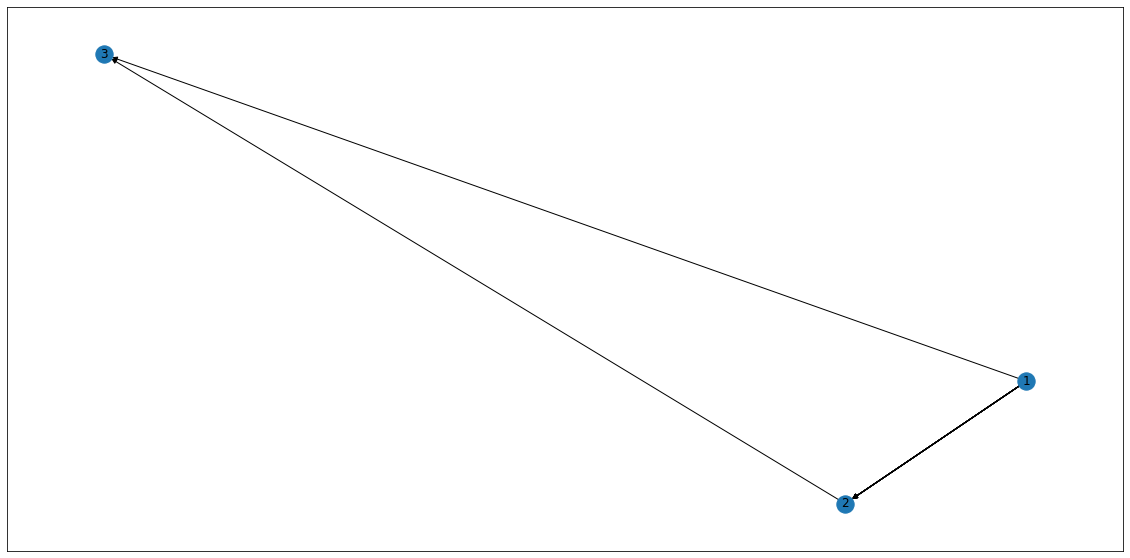

In [16]:
nx.draw_networkx(G)

# Twitter as Graphs

In [17]:
df = pd.read_pickle('data/tweet_data.p')

In [18]:
with open('data/RT_and_QT_info.json','r') as fp:
    RT_and_QT_info=json.load(fp)

In [19]:
def get_all_unique_users():
    users=set(df['user'].to_list())
    for info in RT_and_QT_info.values():
        for user_ in info['retweet_user_info'].values():
            users.add(user_[1])
        for user_ in info['quoted_user_info'].values():
            users.add(user_[1])
    return users

In [20]:
all_users = get_all_unique_users()

In [21]:
tweet_graph = nx.MultiDiGraph()

In [22]:
tweet_graph.add_nodes_from(all_users)

In [23]:
edges=[]

In [24]:
def get_edges_for_tweet(row):
    global edges
    id_=row['tweet_id']
    user_=row['user']
    for rt_user_ in RT_and_QT_info[str(id_)]['retweet_user_info'].values():
            edges.append((rt_user_[1],user_))
    for qt_user_ in RT_and_QT_info[str(id_)]['quoted_user_info'].values():
            edges.append((qt_user_[1],user_))

In [25]:
df.apply(lambda row : get_edges_for_tweet(row),axis=1)

1566831    None
1241688    None
9968688    None
2558232    None
3285366    None
           ... 
58569      None
8631207    None
4539384    None
1001734    None
781194     None
Length: 10000, dtype: object

In [26]:
tweet_graph.add_edges_from(edges)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [27]:
directed_tweet_graph = nx.DiGraph()

In [28]:
directed_tweet_graph.add_nodes_from(all_users)

In [29]:
directed_tweet_graph.add_edges_from(set(edges))

In [30]:
print(nx.info(directed_tweet_graph))

Name: 
Type: DiGraph
Number of nodes: 41720
Number of edges: 44839
Average in degree:   1.0748
Average out degree:   1.0748


## Analysis

### Summary

In [31]:
print(nx.info(tweet_graph))

Name: 
Type: MultiDiGraph
Number of nodes: 41720
Number of edges: 46927
Average in degree:   1.1248
Average out degree:   1.1248


In [32]:
max(dict(tweet_graph.in_degree()).items(), key=operator.itemgetter(1))

('BJP4India', 7240)

In [33]:
max(dict(tweet_graph.out_degree()).items(), key=operator.itemgetter(1))

('YashwantRaut19', 56)

In [34]:
print(f'Number of nodes with zero in-degree { len([i[0] for i in tweet_graph.in_degree if i[1]==0])}')
print(f'Number of nodes with zero out-degree { len([i[0] for i in tweet_graph.out_degree if i[1]==0])}')

Number of nodes with zero in-degree 38949
Number of nodes with zero out-degree 7153


### Do we have isolated groups?

In [35]:
def largest_strong_component_nodes(net):
    components = [i for i in nx.strongly_connected_components(net)]
    return max(components,key=lambda x:len(x))

def largest_weak_component_nodes(net):
    components = [i for i in nx.weakly_connected_components(net)]
    return max(components,key=lambda x:len(x))

In [36]:
nx.number_strongly_connected_components(tweet_graph)

41695

In [37]:
nx.number_weakly_connected_components(tweet_graph)

6362

In [38]:
largest_strong_component = tweet_graph.subgraph(largest_strong_component_nodes(tweet_graph))
largest_weak_component = tweet_graph.subgraph(largest_weak_component_nodes(tweet_graph))

In [39]:
print(f'Number of nodes in largest strongly connected component {largest_strong_component.number_of_nodes()}')
print(f'Number of edges in largest strongly connected component {largest_strong_component.size()}')

Number of nodes in largest strongly connected component 15
Number of edges in largest strongly connected component 176


In [40]:
print(f'Number of nodes in largest weakly connected component {largest_weak_component.number_of_nodes()}')
print(f'Number of edges in largest weakly connected component {largest_weak_component.size()}')

Number of nodes in largest weakly connected component 32799
Number of edges in largest weakly connected component 44103


High number of weak components but very small number of strong components?

### Do we have hubs?

In [41]:
def get_outdegree_dist(net):
    out_degree_record = [i[1] for i in net.out_degree]
    out_degree_record = sorted(out_degree_record,reverse=True)
    degreeCount = collections.Counter(out_degree_record)
    deg, cnt = zip(*degreeCount.items())
    return deg, cnt

In [42]:
def get_indegree_dist(net):
    in_degree_record = [i[1] for i in net.in_degree]
    in_degree_record = sorted(in_degree_record,reverse=True)
    degreeCount = collections.Counter(in_degree_record)
    deg, cnt = zip(*degreeCount.items())
    return deg, cnt

In [43]:
def plot_degree_dist():
    plt.subplot(1, 2, 1)
    plt.plot(deg,cnt)
    plt.title('degree distribution')
    plt.ylabel('count')
    plt.xlabel('degree')

    plt.subplot(1, 2, 2)
    plt.title('degree distribution log log scale')
    plt.ylabel('count')
    plt.xlabel('degree')
    m,b = np.polyfit(np.log10(deg)[:-1],np.log10(cnt)[:-1],1)
    plt.plot(np.log10(deg),np.log10(cnt), np.log10(deg), m*np.log10(deg)+b, '--k')
    plt.show()

In [44]:
deg, cnt = get_outdegree_dist(tweet_graph)

/home/hitkul/anaconda3/envs/PSOSM/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/home/hitkul/anaconda3/envs/PSOSM/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


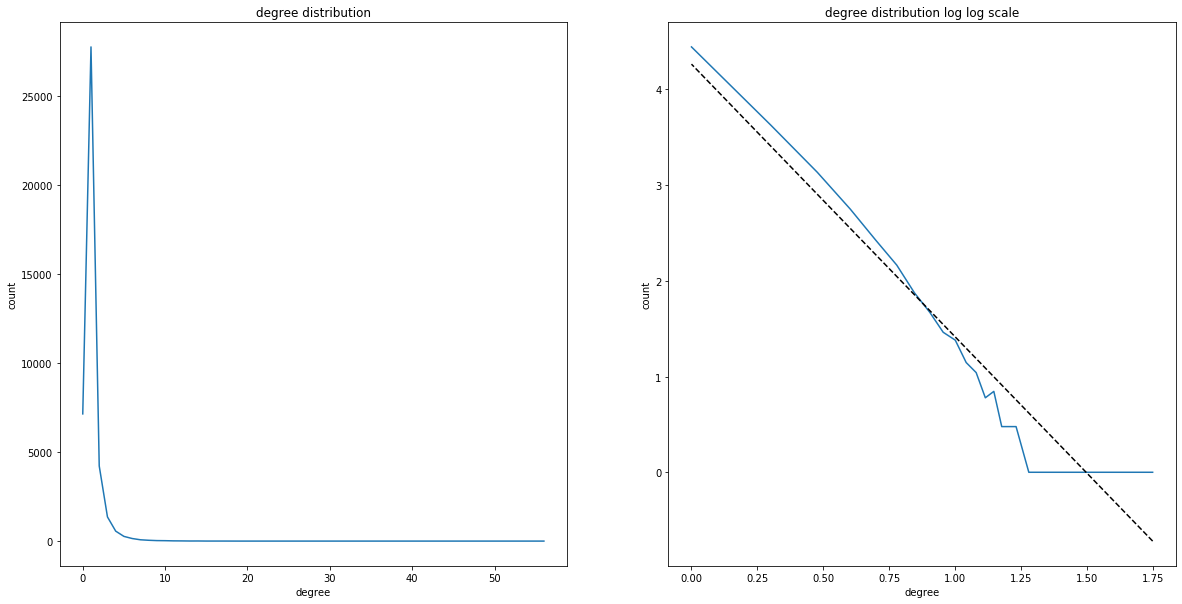

In [45]:
plot_degree_dist()

In [46]:
deg, cnt = get_indegree_dist(tweet_graph)

/home/hitkul/anaconda3/envs/PSOSM/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/home/hitkul/anaconda3/envs/PSOSM/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


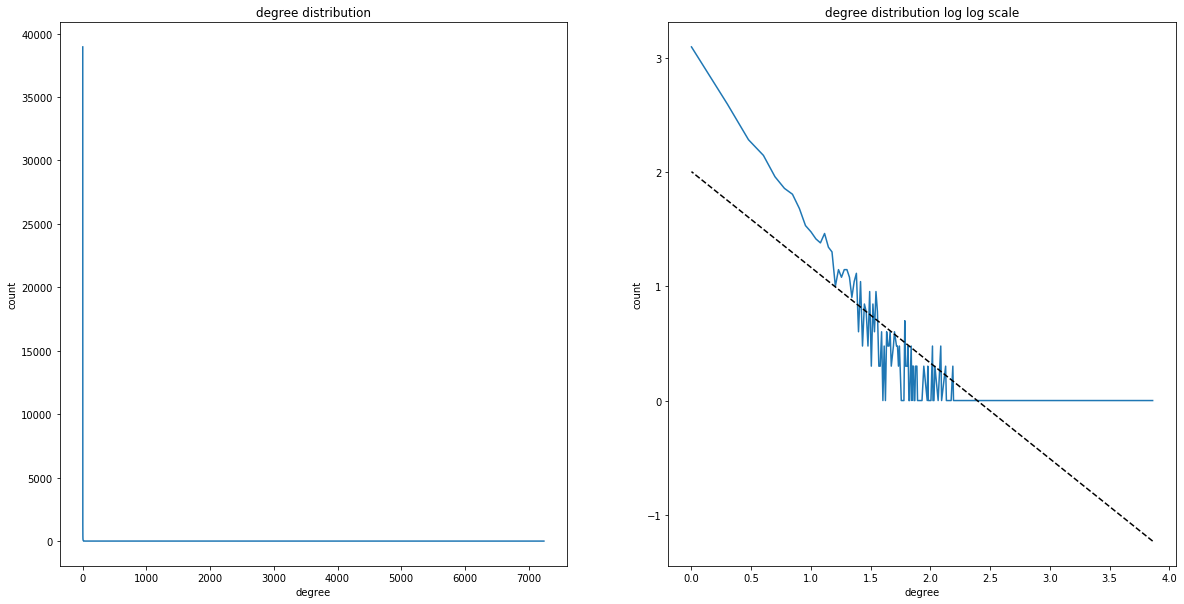

In [47]:
plot_degree_dist()

### Who is at the center of these hubs?

In [48]:
degree_centrality = nx.in_degree_centrality(tweet_graph)

In [49]:
max(degree_centrality.items(), key=operator.itemgetter(1))

('BJP4India', 0.17354203120880174)

In [50]:
highest_centrality = [(key, value) for key, value in sorted(degree_centrality.items(), key=lambda item: item[1])]
highest_centrality[-5:]

[('dpradhanbjp', 0.02411371317625063),
 ('DN_Thakur_Ji', 0.028332414487403822),
 ('JhaSanjay', 0.029650758647139196),
 ('nikhildadhich', 0.09084589755267385),
 ('BJP4India', 0.17354203120880174)]

### How to break the hub?

In [51]:
largest_strong_component = directed_tweet_graph.subgraph(largest_strong_component_nodes(directed_tweet_graph))

In [52]:
flow_centrality = nx.betweenness_centrality(largest_strong_component)

In [53]:
highest_centrality = [(key, value) for key, value in sorted(flow_centrality.items(), key=lambda item: item[1])]
highest_centrality[-5:]

[('JavedAliJamada1', 0.06648351648351648),
 ('shirodkarchintu', 0.07142857142857144),
 ('Afrina_123', 0.0957221350078493),
 ('YashwantRaut19', 0.1277690563404849),
 ('AkhtarS48058093', 0.3053549624978197)]

### What about communication among groups?

In [54]:
nx.average_clustering(directed_tweet_graph)

0.005924100167248551

In [55]:
clustring_coff = nx.clustering(directed_tweet_graph)

In [60]:
highest_clustring_coff = [(key, value) for key, value in sorted(clustring_coff.items(), key=lambda item: item[1])]
highest_clustring_coff[-50:]

[('mrkotians', 0.5),
 ('KDhavlikar', 0.5363636363636364),
 ('dhuri_vasant', 0.5777777777777777),
 ('Dilip78541685', 0.5833333333333334),
 ('Sandhya054', 0.5833333333333334),
 ('DeoditaRod20', 0.5952380952380952),
 ('AmolPaw66620256', 0.6),
 ('SanjayPawaskar3', 0.6),
 ('William64272214', 0.6),
 ('DewariSantosh', 0.6190476190476191),
 ('6189b451f47f41d', 0.6230769230769231),
 ('VinodSh77377262', 0.6333333333333333),
 ('Kailash61303476', 0.6333333333333333),
 ('GujaratPMC', 0.6666666666666666),
 ('DigambarVengur1', 0.6666666666666666),
 ('AnkitaPrabhuga2', 0.6666666666666666),
 ('CydaliaR', 0.6666666666666666),
 ('Supriya90534058', 0.6666666666666666),
 ('Chandra96658820', 0.6666666666666666),
 ('inayat84523989', 0.6666666666666666),
 ('Suchenbab', 0.6666666666666666),
 ('ClifaA', 0.6904761904761905),
 ('GaonkarPrabhu', 0.7),
 ('SurendraGBhat2', 0.7333333333333333),
 ('Pumalik11Malik', 0.75),
 ('William55799494', 0.8333333333333334),
 ('SilvaReema', 0.8333333333333334),
 ('ShashikantGaon4

In [61]:
highest_clustring_coff[:10]

[('Sangeetawasthi3', 0),
 ('KamalChouhan7', 0),
 ('sandy5413', 0),
 ('Anuraggpl', 0),
 ('shahmukesh40', 0),
 ('56_chandu', 0),
 ('TumkurInc', 0),
 ('ernesttheoldman', 0),
 ('Aman26801614', 0),
 ('Pushpendra1289', 0)]

(array([4.1103e+04, 2.5000e+02, 9.0000e+00, 3.8000e+01, 9.0000e+00,
        2.7000e+02, 1.4000e+01, 2.0000e+00, 3.0000e+00, 2.2000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

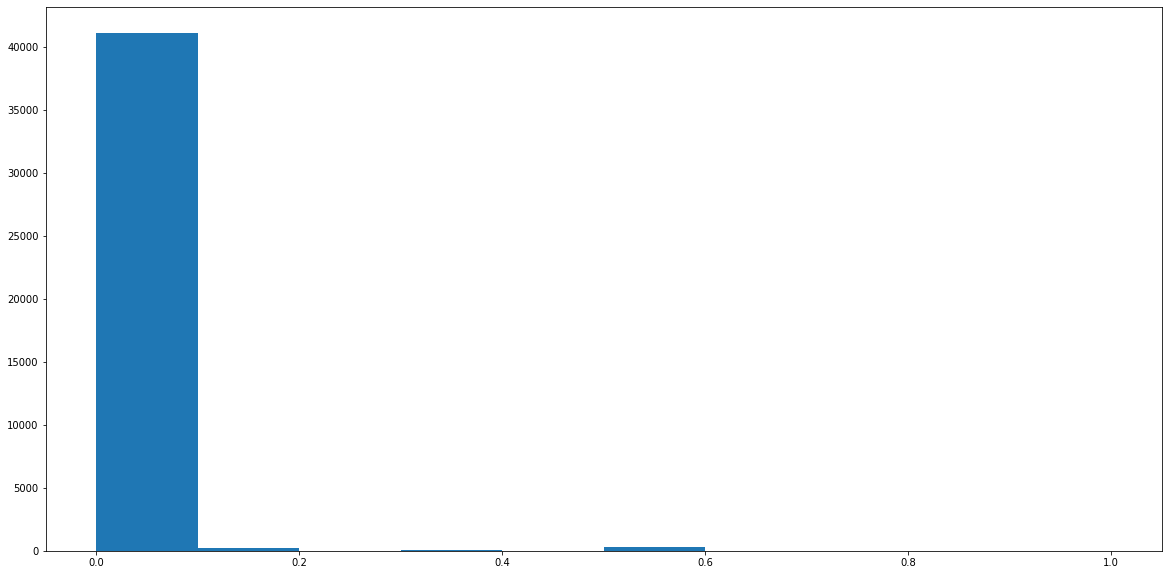

In [58]:
plt.hist(clustring_coff.values())
# plt.xscale('log')
# plt.yscale('log')